# Formation design
Some description here at some point

In [5]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import drama.constants as cnst
from drama.mission.timeline import FormationTimeline
from drama.io import cfg
import stereoid.utils.config as st_config

Set up paths, read configuration file

In [6]:
paths = st_config.parse(section="Paths")
main_dir = paths["main"]
datadirr = paths["data"]
pardir = paths["par"]
print(main_dir)

/Users/plopezdekker/Documents/CODE/STEREOID /Users/plopezdekker/Documents/CODE/STEREOID/PAR/user.cfg
/Users/plopezdekker/Documents/WORK/Harmony


In [7]:
runid = '2021_1'
parfile = os.path.join(pardir, ("Hrmny_%s.cfg" % runid))
conf = cfg.ConfigFile(parfile)
form_id = conf.formation.id
print("formation id: %s" % form_id)
savedirr = os.path.join(os.path.join(os.path.join(main_dir, 'RESULTS'), 'FORMATION'), runid)
savedirr = os.path.join(savedirr, form_id)
os.makedirs(savedirr, exist_ok=True)
save_plots = True
fontsize = 14

formation id: hrmny_xti


Computer formation timeline

In [8]:
ftl = FormationTimeline(parfile, secondary=True)


a =  7076697.62666491  [m]    ;  i =  98.18208940961156  [deg]

Altitude:  h =  692828.0242631901  [m]
Inclination:   98.14632564783096  [deg]
Eccentricity:  0.001131982441389299
FormationTimeline -- Nodal drift = 0.000000 /day
FormationTimeline -- Relative Arg. of Perigee drift = -3.127414 /day

a =  7076697.62666491  [m]    ;  i =  98.18208940961156  [deg]

Altitude:  h =  692828.0242631901  [m]
Inclination:   98.14632564783096  [deg]
Eccentricity:  0.001131982441389299
FormationTimeline -- Nodal drift = 0.000000 /day
FormationTimeline -- Relative Arg. of Perigee drift = -3.127413 /day
FormationTimeline -- Nodal drift = 0.000000 /day
FormationTimeline -- Relative Arg. of Perigee drift = -3.127413 /day
FormationTimeline -- Nodal drift = 0.000000 /day
FormationTimeline -- Relative Arg. of Perigee drift = -3.127413 /day
FormationTimeline -- Nodal drift = 0.000000 /day
FormationTimeline -- Relative Arg. of Perigee drift = -3.127413 /day
FormationTimeline -- Nodal drift = 0.000000 /day
F

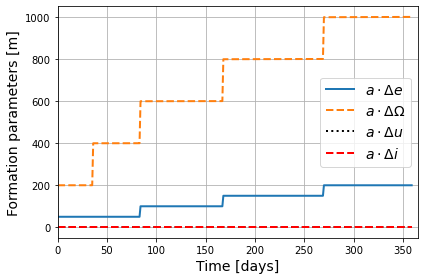

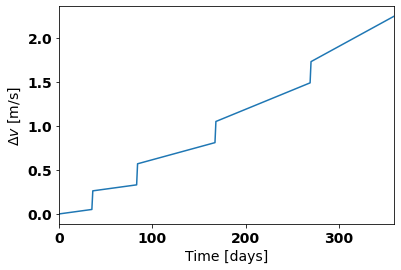

In [9]:
# Plot formation
plt.figure()
lw = 2
plt.plot(ftl.t, ftl.dae, '-', label=r"$a\cdot\Delta e$",
         lw=lw)
plt.plot(ftl.t, np.radians(ftl.domega) * ftl.a, '--',
         label=r"$a\cdot\Delta \Omega$",
         lw=lw)
plt.plot(ftl.t, np.radians(ftl.du * ftl.a), 'k:', label=r"$a\cdot\Delta u$",
         lw=lw)
plt.plot(ftl.t, np.radians(ftl.di * ftl.a), 'r--', label=r"$a\cdot\Delta i$",
         lw=lw)
plt.xlabel('Time [days]', fontsize=fontsize)
plt.ylabel('Formation parameters [m]', fontsize=fontsize)
plt.legend(loc='best', fontsize=fontsize)
plt.xlim((0,365))
plt.grid(True)
plt.tight_layout()
if save_plots:
    plt.savefig(os.path.join(savedirr, 'Hrmny_formation_conf.png'))
    ftl.view_delta_v(savefile=os.path.join(savedirr, 'delta_v.png'))

Calculate and plot Doppler shifts associated to formation. These need to be small compared to the available or processed Doppler bandwidth (around 300 Hz for IWS, 150 Hz or EW)

/Users/plopezdekker/Documents/CODE/DRAMA/drama/mission/timeline/formation.py:1423: UserWarning: No contour levels were found within the data range.
  cnt = plt.contour(


ValueError: Specified levels [0, 50, 100, 150, 200, 250, 300] don't match available levels [0.003338822025398258]

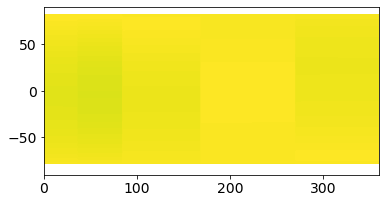

In [10]:
doplevels = [0, 50, 100, 150, 200, 250, 300]
#doplevels = None
ftl.view_baseline('Doppler', inc=30, ascending=True, vmax=350, clevels=doplevels,
                  savefile=os.path.join(savedirr, 'dDop_IWS_near_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS near")
#plt.close()
ftl.view_baseline('Doppler', inc=30, ascending=False, vmax=350, clevels=doplevels,
                  savefile=os.path.join(savedirr, 'dDop_IWS_near_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS near")
#plt.close()
ftl.view_baseline('Doppler', inc=45, ascending=True, vmax=350, clevels=doplevels,
                  savefile=os.path.join(savedirr, 'dDop_IWS_far_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS far")
#plt.close()
ftl.view_baseline('Doppler', inc=45, ascending=False, vmax=350, clevels=doplevels,
                  savefile=os.path.join(savedirr, 'dDop_IWS_far_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS far")
print("Plottting Doppler shifts")

# Height of ambiguities

Plottting Heights of ambiguity


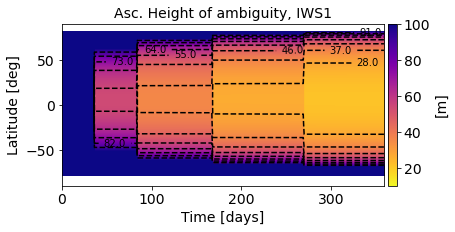

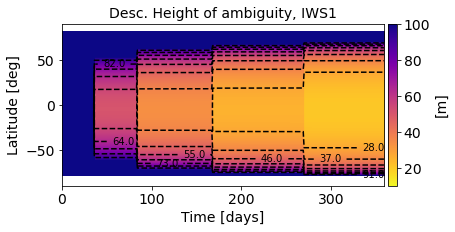

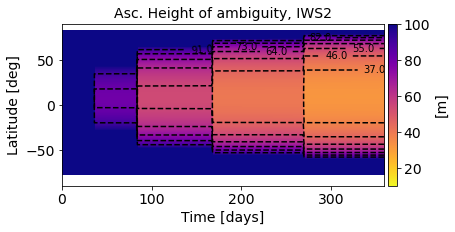

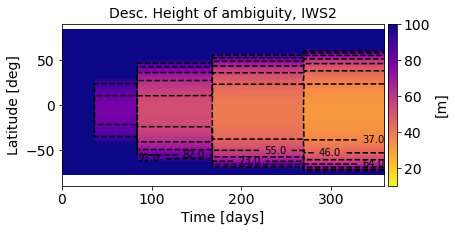

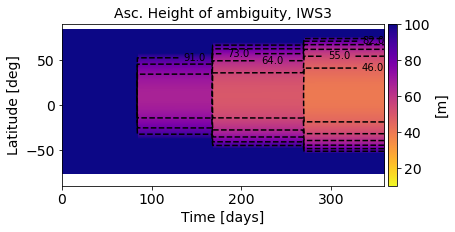

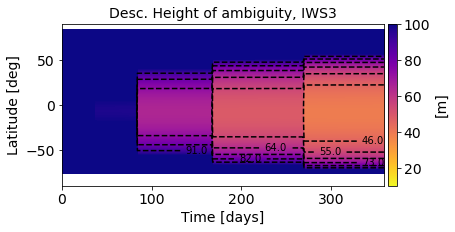

In [11]:
cmap_hamb = 'plasma_r' #''autumn_r'
hlevels = None  # np.array([30, 40, 60, 70, 80, 90])* 4
ftl.view_baseline('h_amb', inc=33, ascending=True, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS1_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS1", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('h_amb', inc=33, ascending=False, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS1_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS1", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('h_amb', inc=39, ascending=True, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS2_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS2", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('h_amb', inc=39, ascending=False, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS2_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS2", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('h_amb', inc=43, ascending=True, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS3_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS3", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('h_amb', inc=43, ascending=False, vmin=10, vmax=100,
                  savefile=os.path.join(savedirr, 'h_amb_IWS3.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS3", cmap=cmap_hamb, clevels=hlevels)
print("Plottting Heights of ambiguity")

## Perpendicular baselines

In [ ]:
cmap_hamb = 'plasma_r' #''autumn_r'
hlevels = None  # np.array([30, 40, 60, 70, 80, 90])* 4
h_max = 2.5e3
ftl.view_baseline('perp', inc=33, ascending=True, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS1_asc.png'),
                  contour=False, fontsize=fontsize, titlesufix=", IWS1", cmap=cmap_hamb, clevels=hlevels, just_plot=True)
ftl.view_baseline('perp', inc=33, ascending=False, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS1_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS1", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('perp', inc=39, ascending=True, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS2_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS2", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('perp', inc=39, ascending=False, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS2_dsc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS2", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('perp', inc=43, ascending=True, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS3_asc.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS3", cmap=cmap_hamb, clevels=hlevels)
ftl.view_baseline('perp', inc=43, ascending=False, vmin=0, vmax=h_max,
                  savefile=os.path.join(savedirr, 'b_perp_IWS3.png'),
                  contour=True, fontsize=fontsize, titlesufix=", IWS3", cmap=cmap_hamb, clevels=hlevels)
print("Plottting Heights of ambiguity")

# Spectral shift

In [ ]:
ftl.view_baseline('df', inc=33, ascending=True, vmax=10, fontsize=fontsize,
                  savefile=os.path.join(savedirr, 'df_asc.png'), contour=True, titlesufix=", IWS1")
ftl.view_baseline('df', inc=33, ascending=False, vmax=10, fontsize=fontsize,
                  savefile=os.path.join(savedirr, 'df_dsc.png'), contour=True, titlesufix=", IWS1")
ftl.view_baseline('df', inc=43, ascending=True, vmax=10, fontsize=fontsize,
                  savefile=os.path.join(savedirr, 'df_asc_IWS3.png'), contour=True, titlesufix=", IWS3")
ftl.view_baseline('df', inc=43, ascending=False, vmax=10, fontsize=fontsize,
                  savefile=os.path.join(savedirr, 'df_dsc_IWS3.png'), contour=True, titlesufix=", IWS3")
print("Spectral shift")

# Masks
We can define masks based on a maximum Doppler of a maximum spectral shift

In [ ]:
DopMaskIWS1asc = ftl.acquisition_mask(33, dDoppler_max=100, ascending=True)
DopMaskIWS1dsc = ftl.acquisition_mask(33, dDoppler_max=100, ascending=False)
DopMaskIWS2asc = ftl.acquisition_mask(38, dDoppler_max=100, ascending=True)
DopMaskIWS2dsc = ftl.acquisition_mask(38, dDoppler_max=100, ascending=False)
DopMaskIWS3asc = ftl.acquisition_mask(43, dDoppler_max=100, ascending=True)
DopMaskIWS3dsc = ftl.acquisition_mask(43, dDoppler_max=100, ascending=False)

In [ ]:
corners = [0, DopMaskIWS1asc.shape[1] - 1, -90, 90]
plt.figure()
plt.imshow(DopMaskIWS1asc, origin='lower', extent=corners, cmap='winter')
plt.xlabel('Time [days]', fontsize=18)
plt.ylabel('Latitude [deg]', fontsize=18)
plt.title('Ascending acquisition mask, IWS1')
plt.grid(True)
plt.savefig(os.path.join(savedirr, 'Dop100Mask_IWS1_asc'), bbox_inches='tight')
plt.figure()
plt.imshow(DopMaskIWS1dsc, origin='lower', extent=corners, cmap='winter')
plt.xlabel('Time [days]', fontsize=18)
plt.ylabel('Latitude [deg]', fontsize=18)
plt.title('Descending acquisition mask, IWS1')
plt.grid(True)
plt.savefig(os.path.join(savedirr, 'Dop100Mask_IWS1_dsc'), bbox_inches='tight')
plt.figure()
plt.imshow(DopMaskIWS2asc, origin='lower', extent=corners, cmap='winter')
plt.xlabel('Time [days]', fontsize=18)
plt.ylabel('Latitude [deg]', fontsize=18)
plt.title('Ascending acquisition mask, IWS2')
plt.grid(True)
plt.savefig(os.path.join(savedirr, 'Dop100Mask_IWS2_asc'), bbox_inches='tight')
plt.figure()
plt.imshow(DopMaskIWS2dsc, origin='lower', extent=corners, cmap='winter')
plt.xlabel('Time [days]', fontsize=18)
plt.ylabel('Latitude [deg]', fontsize=18)
plt.title('Descending acquisition mask, IWS2')
plt.grid(True)
plt.savefig(os.path.join(savedirr, 'Dop100Mask_IWS2_dsc'), bbox_inches='tight')